In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Brock\AppData\Local\Temp\pip-install-rlg6rbda\tensorflow-gpu_101416bee5d34d16a388df5761702113\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


In [7]:
from IPython.display import clear_output

!pip install -q tensorflow==2.4.1

clear_output()

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import imageio.v3 as iio
import re
import os
tf.get_logger().setLevel('INFO')

#load data set
batch_size = 32
img_height = 544
img_width = 512
data_dir = './images/'
tf.keras.backend.clear_session()
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names

#AUTOTUNE = tf.data.AUTOTUNE

#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 2
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

model = tf.keras.Sequential([
   tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
   # since Conv2D is the first layer of the neural network, we should also specify the size of the input
   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_width, img_height, 1)),
   tf.keras.layers.BatchNormalization(),
   # apply pooling
   tf.keras.layers.MaxPooling2D(2,2),
   # and repeat the process
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPooling2D(2,2),
   # flatten the result to feed it to the dense layer
   # and define 512 neurons for processing the output coming by the previous layers
   tf.keras.layers.Flatten(), 
   tf.keras.layers.Dense(8, activation='relu'), 
   # a single output neuron. The result will be 0 if the image is a cat, 1 if it is a dog
   tf.keras.layers.Dense(1, activation='sigmoid')
    
   #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
   #tf.keras.layers.Conv2D(input_shape=(img_width, img_height, 1), filters=8, kernel_size=3, strides=2, activation='relu', name='Conv1'),
   #tf.keras.layers.Flatten(),
   #tf.keras.layers.Dense(num_classes, name='Dense', activation='softmax')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  callbacks=[reduce_lr]
)


Found 17999 files belonging to 2 classes.
Using 14400 files for training.
Found 17999 files belonging to 2 classes.
Using 3599 files for validation.
Epoch 1/5
450/450 [==============================] - 1750s 4s/step - loss: 2.6882 - accuracy: 0.9181 - val_loss: 4.2542 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 2/5
450/450 [==============================] - 1726s 4s/step - loss: 0.2631 - accuracy: 0.9197 - val_loss: 0.2699 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 3/5
450/450 [==============================] - 1742s 4s/step - loss: 0.1852 - accuracy: 0.9197 - val_loss: 0.1221 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 4/5
450/450 [==============================] - 1751s 4s/step - loss: 0.1412 - accuracy: 0.9197 - val_loss: 0.1185 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 5/5
450/450 [==============================] - 1797s 4s/step - loss: 0.1216 - accuracy: 0.9197 - val_loss: 0.2286 - val_accuracy: 0.9211 - lr: 0.0010


In [9]:
pip install -U scikit-learn

     ---------------------------------------- 9.2/9.2 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


In [14]:
pred = model.predict(val_ds)
file_paths = val_ds.file_paths
f = open("predictions.txt", "w")
for i in range(len(pred)):
    f.write(str(file_paths[i]) + ' ')
    for j in range(len(pred[i])):
        f.write(str(pred[i, j]) + ' ')
    f.write('\n')
f.close()
print(pred)

113/113 [==============================] - 93s 821ms/step
[[0.62176305]
 [1.        ]
 [1.        ]
 ...
 [1.        ]
 [0.62176305]
 [0.62176305]]


In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

val_labels = tf.concat([y for x, y in val_ds], axis=0).numpy()
#print(pred)
#print(val_labels)
fpr, tpr, thresholds = roc_curve(val_labels, pred)
auc = auc(fpr, tpr)


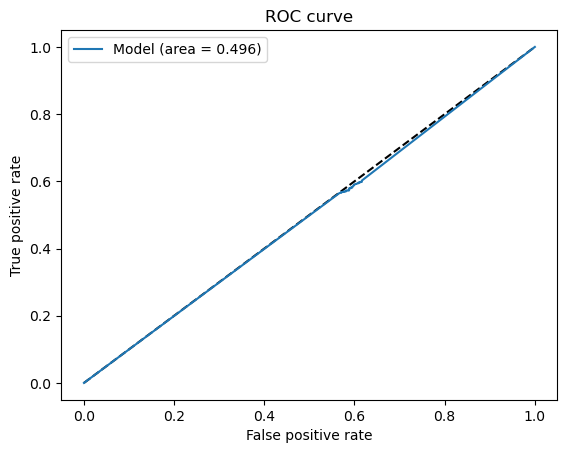

In [16]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Model (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 544, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 542, 510, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 542, 510, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 271, 255, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 269, 253, 64)      9280      
                                                                 
 batch_normalization_1 (Bat  (None, 269, 253, 64)      2